<a href="https://colab.research.google.com/github/Madihajavaid12345/-TASK-5-Analyze-US-Traffic-Accident-Data-Prodigy-infotech/blob/main/_%F0%9F%9A%A6_TASK_5_%E2%80%93_Analyze_US_Traffic_Accident_Data_Prodigy_infotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Short EDA Report – Task 5
##📝 Traffic Accident Analysis using US Accidents Dataset
### Submitted by: Madiha Rehan

🎓 Intern – Data Science Track
Prodigy Infotech

 ### Objective:

Analyze accident data to find patterns related to:

Road conditions

Weather

Time of day

## visualize:
Hotspots

Contributing factors

### Key Insights:

🚦 Road Conditions:

 More accidents near junctions, crossings, and traffic signals.

🌧️ Weather:

Most accidents occur in clear/cloudy weather; fewer but severe in rain/snow.

🕒 Time:

 Peak accident times are rush hours – 7–9 AM & 4–6 PM.

⚠️ Severity:
\
 Majority are Severity 2 (moderate); Severity 4 is rare.

📍 Top States with Most Accidents:
CA, FL, TX, GA, NC.

🗺️ Hotspots & Contributing Factors visualized using heatmaps and bar charts.

📦 Tools Used:

Python, Pandas, Seaborn, Matplotlib, Google Colab, Kaggle API



In [2]:
# Step 1: Import the libraries (tools) we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [3]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madihajavaid","key":"6114d031d1f5738657f5a2073fec9fe9"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d sobhanmoosavi/us-accidents


Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
 99% 647M/653M [00:03<00:00, 48.2MB/s]
100% 653M/653M [00:03<00:00, 180MB/s] 


In [6]:
!unzip us-accidents.zip


Archive:  us-accidents.zip
  inflating: US_Accidents_March23.csv  


In [7]:
chunks = pd.read_csv("/content/US_Accidents_March23.csv", chunksize=50000)

# Example: Read and combine first 2 chunks
df = pd.concat([chunk for i, chunk in enumerate(chunks) if i < 2])
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [8]:
# Step 4: Check and count missing data
df.isnull().sum().sort_values(ascending=False)


,0
End_Lng,100000
End_Lat,100000
Wind_Chill(F),95678
Precipitation(in),92632
Wind_Speed(mph),23820
Humidity(%),1856
Visibility(mi),1846
Weather_Condition,1604
Temperature(F),1591
Pressure(in),1292


In [9]:
# Drop rows with very few missing values (like 1 missing cell)
df = df.dropna(subset=['Civil_Twilight', 'City', 'Astronomical_Twilight', 'Sunrise_Sunset'])


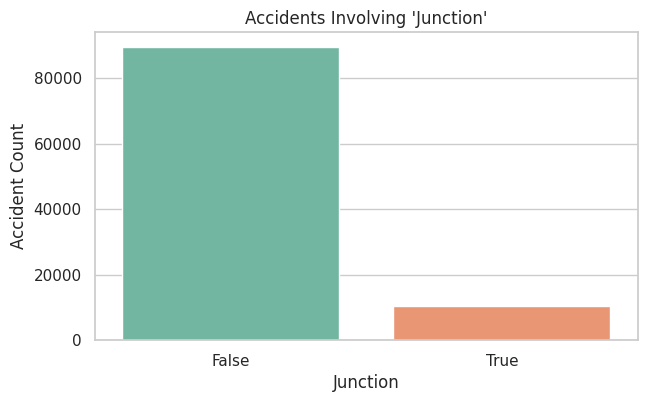

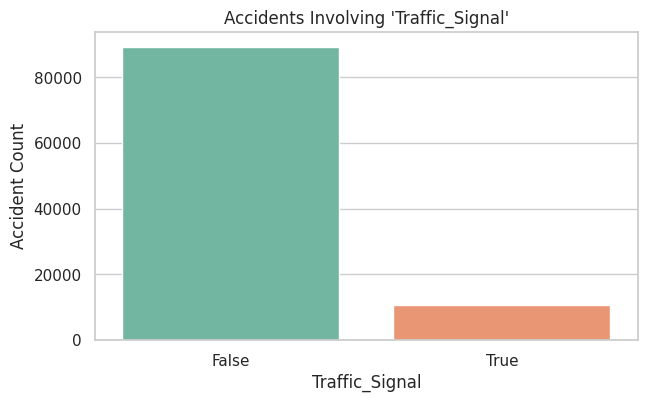

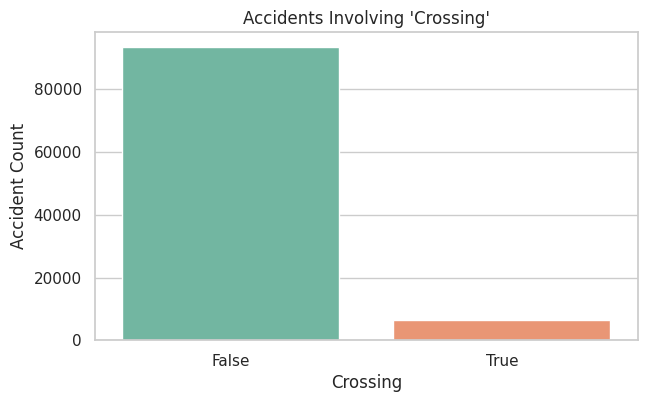

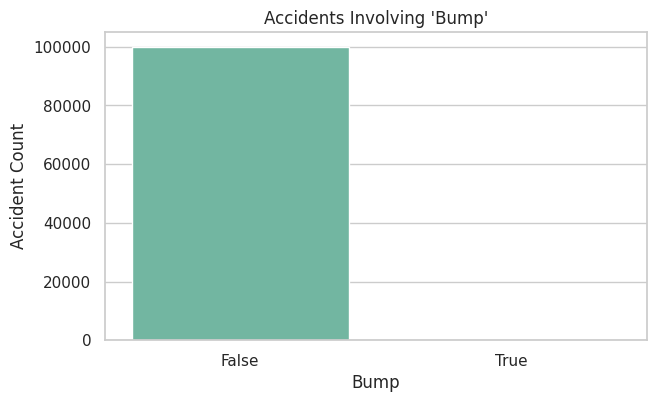

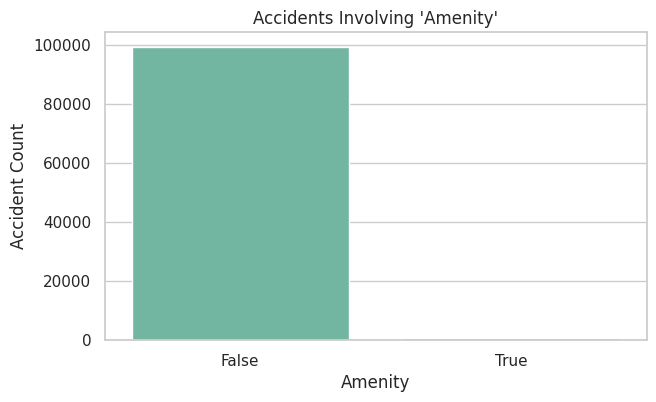

In [21]:
# Set style for better visual appeal
sns.set(style="whitegrid")

# Features related to road conditions
road_features = ['Junction', 'Traffic_Signal', 'Crossing', 'Bump', 'Amenity']

# Plotting the count of accidents involving each road feature
for feature in road_features:
    plt.figure(figsize=(7,4))
    sns.countplot(x=feature, data=df, hue=feature, palette='Set2', legend=False)

    plt.title(f"Accidents Involving '{feature}'")
    plt.xlabel(f"{feature}")
    plt.ylabel("Accident Count")
    plt.show()

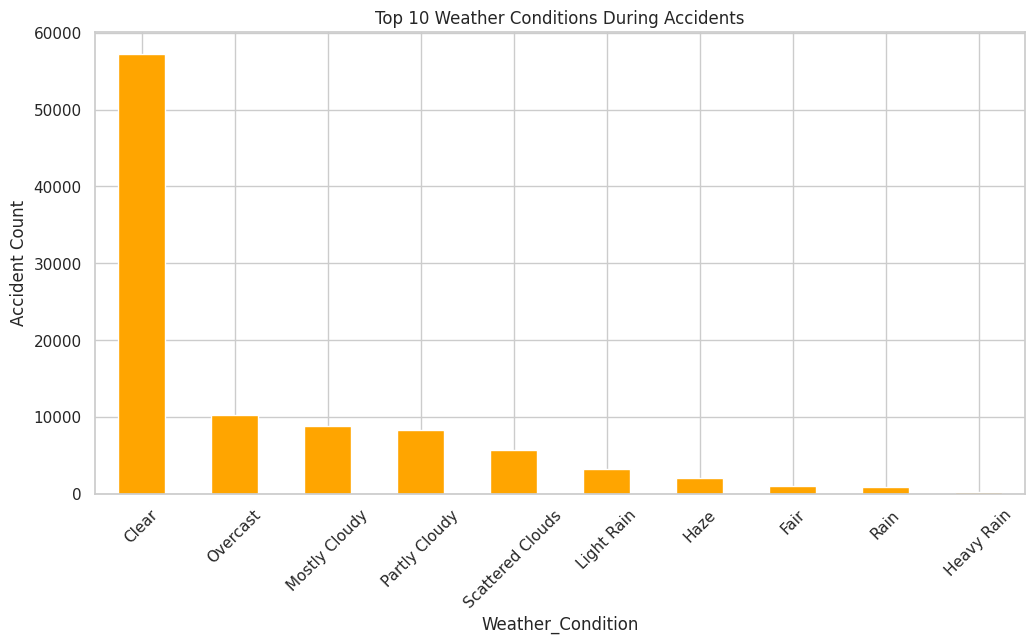

In [22]:
plt.figure(figsize=(12,6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Weather Conditions During Accidents")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()

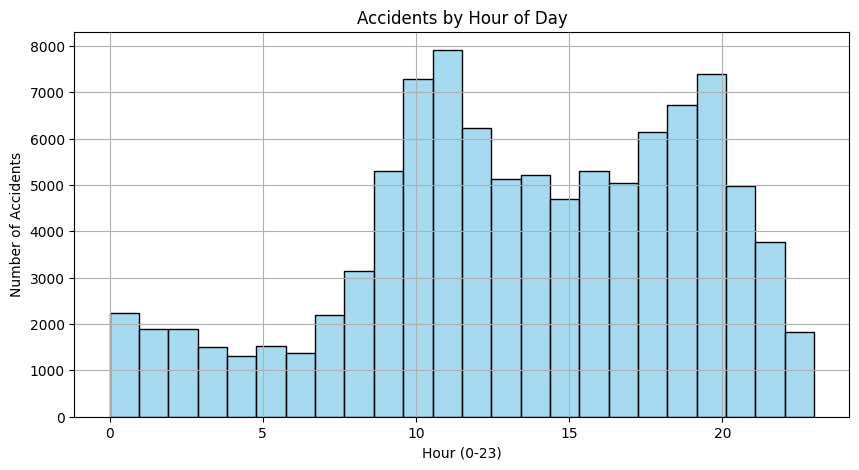

In [14]:
# Convert Start Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour

# Plot
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24, kde=False, color='skyblue')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Side', data=df, palette='Set2')
plt.title("🛣️ Accidents by Road Side (A or B)")
plt.show()


In [12]:
print(df.columns.tolist())


['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Hour']


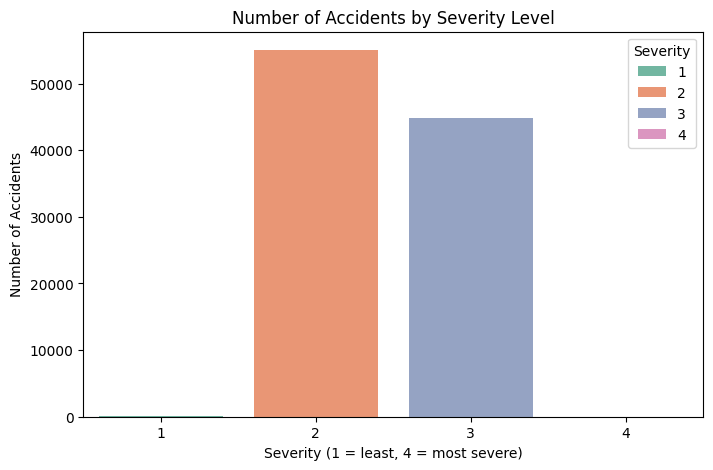

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Severity', hue='Severity', data=df, palette='Set2')


plt.title("Number of Accidents by Severity Level")
plt.xlabel("Severity (1 = least, 4 = most severe)")
plt.ylabel("Number of Accidents")
plt.show()

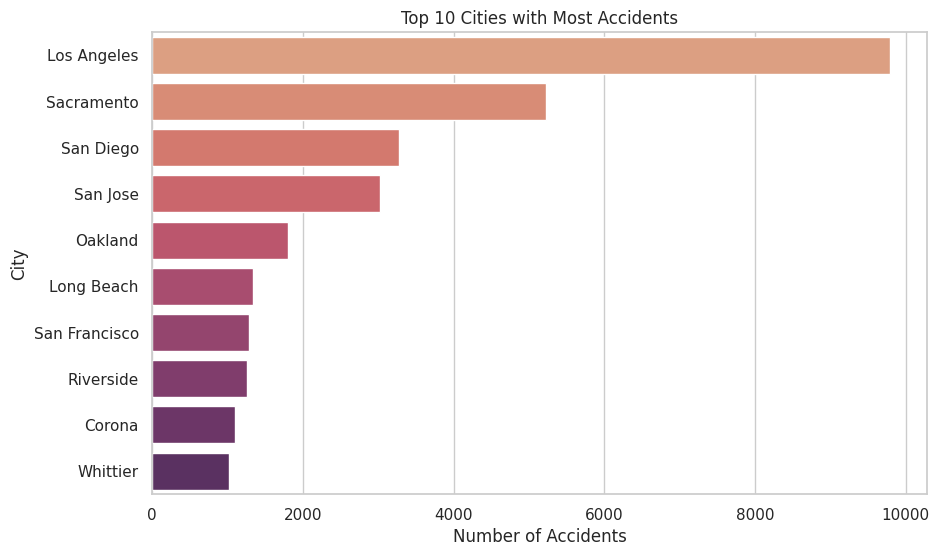

In [33]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='flare')
plt.title("Top 10 Cities with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("City")
plt.show()


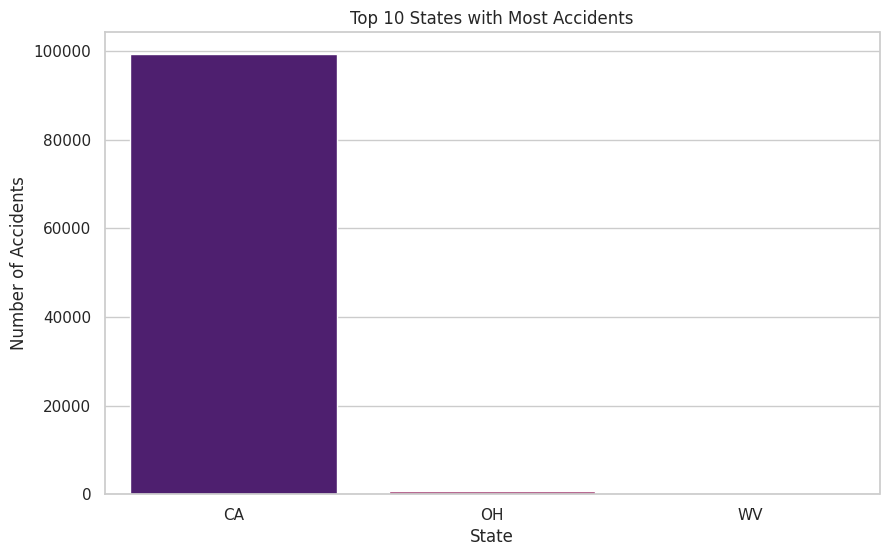

In [32]:
import warnings
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(10,6))

warnings.filterwarnings("ignore", category=FutureWarning)

# Your barplot code
sns.barplot(x=top_states.index, y=top_states.values, palette='magma')


plt.title("Top 10 States with Most Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


In [25]:
import folium
from folium.plugins import HeatMap

# Filter small sample to avoid memory crash
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Create base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add heatmap
HeatMap(data=sample_df.values.tolist()).add_to(m)

m  # In Colab: use m._repr_html_() to show
